# Train Image Data Augmentation

## Mount Google Drive

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd /content/gdrive/MyDrive/Capstone/C501/ModelPreparation/Dataset/Ducky_Chicken/

/content/gdrive/MyDrive/Capstone/C501/ModelPreparation/Dataset/Ducky_Chicken


In [ ]:
%ls

Ducky_Chicken_100.jpg  Ducky_Chicken_16.jpg   Ducky_Chicken_31.jpg
Ducky_Chicken_101.jpg  Ducky_Chicken_170.jpg  Ducky_Chicken_32.jpg
Ducky_Chicken_102.jpg  Ducky_Chicken_171.jpg  Ducky_Chicken_33.jpg
Ducky_Chicken_103.jpg  Ducky_Chicken_172.jpg  Ducky_Chicken_34.jpg
Ducky_Chicken_104.jpg  Ducky_Chicken_173.jpg  Ducky_Chicken_35.jpg
Ducky_Chicken_105.jpg  Ducky_Chicken_174.jpg  Ducky_Chicken_36.jpg
Ducky_Chicken_106.jpg  Ducky_Chicken_175.jpg  Ducky_Chicken_37.jpg
Ducky_Chicken_107.jpg  Ducky_Chicken_176.jpg  Ducky_Chicken_38.jpg
Ducky_Chicken_108.jpg  Ducky_Chicken_177.jpg  Ducky_Chicken_39.jpg
Ducky_Chicken_109.jpg  Ducky_Chicken_178.jpg  Ducky_Chicken_3.jpg
Ducky_Chicken_10.jpg   Ducky_Chicken_179.jpg  Ducky_Chicken_40.jpg
Ducky_Chicken_110.jpg  Ducky_Chicken_17.jpg   Ducky_Chicken_41.jpg
Ducky_Chicken_111.jpg  Ducky_Chicken_180.jpg  Ducky_Chicken_42.jpg
Ducky_Chicken_112.jpg  Ducky_Chicken_181.jpg  Ducky_Chicken_43.jpg
Ducky_Chicken_113.jpg  Ducky_Chicken_182.jpg  Ducky_Chicken_44.

In [ ]:
drive_dataset_dir = "/content/gdrive/MyDrive/Capstone/C501/ModelPreparation/Dataset/Ducky_Chicken/"

## Import Depedencies

In [ ]:
import os
from os import path
import pathlib
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt

import random
import shutil
import io
import imageio
import glob
import scipy.misc
import cv2
import h5py
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf

%matplotlib inline

## Define Helper Function

In [ ]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path.

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

## Create Augmented Data

In [ ]:
%cd /content

/content


In [ ]:
len(os.listdir(drive_dataset_dir))

228

In [ ]:
!mkdir /content/train
!mkdir /content/train/Ducky_Chicken

In [ ]:
# Move image dataset to train directory
image_dir = '/content/train/Ducky_Chicken'
for i in range(1, len(os.listdir(drive_dataset_dir))+1):
  image_extra_dir = drive_dataset_dir + "Ducky_Chicken_" + str(i) + ".jpg"
  shutil.copy(image_extra_dir, image_dir)

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    fill_mode = 'nearest',
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 45,
    zoom_range = 0.1,
    rescale=1./255
)

In [ ]:
# If you want to create new augmented images
#%rm -rf '/content/train/augmented'

In [ ]:
# Create augmented data dir
if path.exists('/content/train/augmented') == False:
  os.mkdir('/content/train/augmented')

In [ ]:
augmented_dir = '/content/train/augmented'
train_image_dir = '/content/train'
train_generator = datagen.flow_from_directory(
    train_image_dir,
    target_size = (896, 896),
    color_mode ='rgb',
    classes = ['Ducky_Chicken'],
    class_mode ='binary',
    batch_size = 20,
    seed = 42,
    save_to_dir= augmented_dir,
    save_prefix='augmented',
    save_format='jpg',
    subset=None,
    interpolation='nearest'
)

Found 228 images belonging to 1 classes.


In [ ]:
# Generate batch times i images
for i in range(12):
    train_generator.next()

In [ ]:
# Check number of augmented images
len(os.listdir(augmented_dir))

228

## Visualize Augmented Images

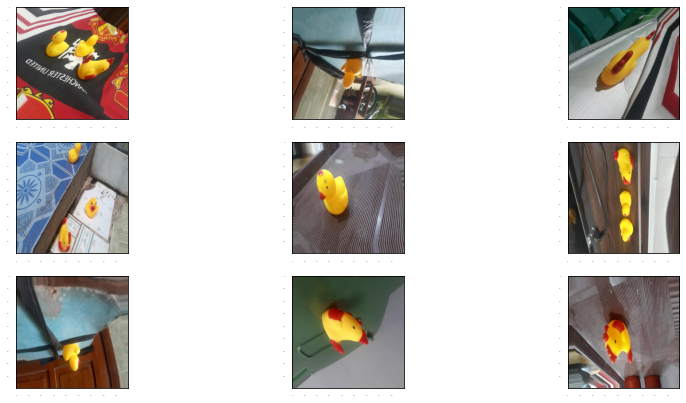

In [ ]:
# Load images and visualize
train_images_np = []
#number_of_train_images = len(os.listdir(augmented_dir))
number_of_train_images = 9
for i in range(0, number_of_train_images):
  image_path = os.path.join(augmented_dir, os.listdir(augmented_dir)[i])
  train_images_np.append(load_image_into_numpy_array(image_path))

plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = False
plt.rcParams['ytick.labelsize'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['figure.figsize'] = [14, 7]

for idx, train_image_np in enumerate(train_images_np[0:9]):
  plt.subplot(3, 3, idx+1)
  plt.imshow(train_image_np)
plt.show()

## Zip Augmented Images Folder

In [ ]:
!zip -r /content/augmented_images.zip /content/train/augmented

  adding: content/train/augmented/ (stored 0%)
  adding: content/train/augmented/augmented_111_1498614.jpg (deflated 1%)
  adding: content/train/augmented/augmented_138_9941190.jpg (deflated 1%)
  adding: content/train/augmented/augmented_147_2814652.jpg (deflated 2%)
  adding: content/train/augmented/augmented_49_8456867.jpg (deflated 0%)
  adding: content/train/augmented/augmented_161_8699498.jpg (deflated 0%)
  adding: content/train/augmented/augmented_186_3130808.jpg (deflated 1%)
  adding: content/train/augmented/augmented_137_666326.jpg (deflated 1%)
  adding: content/train/augmented/augmented_224_427980.jpg (deflated 5%)
  adding: content/train/augmented/augmented_159_3591789.jpg (deflated 0%)
  adding: content/train/augmented/augmented_218_9369262.jpg (deflated 1%)
  adding: content/train/augmented/augmented_149_5814441.jpg (deflated 1%)
  adding: content/train/augmented/augmented_86_3654501.jpg (deflated 2%)
  adding: content/train/augmented/augmented_184_3239576.jpg (deflated